In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
The data were drawn from https://ourworldindata.org/ which were in turn drawn from various official Greek sources.
Their coronavirus dataset is freely available in https://github.com/owid/covid-19-data/tree/master/public/data.

In [2]:
!wget https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

--2020-12-19 17:34:50--  https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.16.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.16.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13521906 (13M) [text/plain]
Saving to: ‘owid-covid-data.csv.7’

owid-covid-data.csv 100%[===================>]  12,89M  9,19MB/s    in 1,4s    

2020-12-19 17:34:57 (9,19 MB/s) - ‘owid-covid-data.csv.7’ saved [13521906/13521906]



# Take a look at the dataset

In [3]:
path = "owid-covid-data.csv"
df = pd.read_csv(path)
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'ag

In [4]:
gr = df.loc[ df["location"] == "Greece" ]

In [5]:
with pd.option_context('display.max_rows', 50, 'display.max_columns', 60):
    display(gr)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
19254,GRC,Europe,Greece,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10423056.0,83.479,45.3,20.396,14.524,24574.382,1.5,175.695,4.55,35.3,52.0,NaN,4.21,82.24,0.87
19255,GRC,Europe,Greece,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10423056.0,83.479,45.3,20.396,14.524,24574.382,1.5,175.695,4.55,35.3,52.0,NaN,4.21,82.24,0.87
19256,GRC,Europe,Greece,2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10423056.0,83.479,45.3,20.396,14.524,24574.382,1.5,175.695,4.55,35.3,52.0,NaN,4.21,82.24,0.87
19257,GRC,Europe,Greece,2020-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10423056.0,83.479,45.3,20.396,14.524,24574.382,1.5,175.695,4.55,35.3,52.0,NaN,4.21,82.24,0.87
19258,GRC,Europe,Greece,2020-02-26,1.0,NaN,NaN,NaN,NaN,NaN,0.096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10423056.0,83.479,45.3,20.396,14.524,24574.382,1.5,175.695,4.55,35.3,52.0,NaN,4.21,82.24,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19550,GRC,Europe,Greece,2020-12-14,125173.0,639.0,1207.429,3687.0,62.0,85.000,12009.242,61.306,115.842,353.735,5.948,8.155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15624.0,1.499,0.077,12.9,samples tested,NaN,NaN,NaN,10423056.0,83.479,45.3,20.396,14.524,24574.382,1.5,175.695,4.55,35.3,52.0,NaN,4.21,82.24,0.87
19551,GRC,Europe,Greece,2020-12-15,126372.0,1199.0,1189.571,3785.0,98.0,84.429,12124.275,115.033,114.129,363.137,9.402,8.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2607015.0,250.12,NaN,14616.0,1.402,0.081,12.3,samples tested,NaN,NaN,NaN,10423056.0,83.479,45.3,20.396,14.524,24574.382,1.5,175.695,4.55,35.3,52.0,NaN,4.21,82.24,0.87
19552,GRC,Europe,Greece,2020-12-16,127557.0,1185.0,1119.571,3870.0,85.0,83.000,12237.966,113.690,107.413,371.292,8.155,7.963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10423056.0,83.479,45.3,20.396,14.524,24574.382,1.5,175.695,4.55,35.3,52.0,NaN,4.21,82.24,0.87
19553,GRC,Europe,Greece,2020-12-17,128710.0,1153.0,1065.286,3948.0,78.0,82.571,12348.586,110.620,102.205,378.776,7.483,7.922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10423056.0,83.479,45.3,20.396,14.524,24574.382,1.5,175.695,4.55,35.3,52.0,NaN,4.21,82.24,0.87


In [6]:
with pd.option_context('display.max_rows', 50, 'display.max_columns', 60):
    display(gr[["location", "date", "new_tests", "total_tests", "new_cases_smoothed"]]) #need display to show the dataframe when using with in jupyter

,location,date,new_tests,total_tests,new_cases_smoothed
19254,Greece,2020-02-02,NaN,NaN,NaN
19255,Greece,2020-02-09,NaN,NaN,NaN
19256,Greece,2020-02-15,NaN,NaN,NaN
19257,Greece,2020-02-23,NaN,NaN,NaN
19258,Greece,2020-02-26,NaN,NaN,NaN
...,...,...,...,...,...
19550,Greece,2020-12-14,NaN,NaN,1207.429
19551,Greece,2020-12-15,NaN,2607015.0,1189.571
19552,Greece,2020-12-16,NaN,NaN,1119.571
19553,Greece,2020-12-17,NaN,NaN,1065.286


In [7]:
inf_gr = gr[["date", "new_tests", "total_tests", "new_cases"]].copy()

# Inference
There appear to be missing data both in the "new_tests" columns and in the "total_tests" columns. We use the "total_tests" column to infer "new_tests". Between two dates that do have a report of the cumulative number of tests, we assume a uniform distribution of the difference of the tests between those two dates.

In [8]:
num_tests = [] 
k = 0
last = 0
s = 0
for total in inf_gr["total_tests"]:
    if np.isnan(total):
        k += 1
    else:
        k += 1
        new = []
        new = [ (total - last) /(k) ] * (k)
        s += ((total - last) /(k)) * k
        num_tests.extend(new)
        last = total
        k = 0
if k != 0:
    num_tests.extend([np.nan]*k)

In [9]:
len(inf_gr["new_tests"])

301

In [10]:
inf_gr["new_tests"] = num_tests

In [11]:
import numpy as np
from scipy.signal import find_peaks

tests = np.array(num_tests)
argpeaks, _ = find_peaks(tests, height=30000)
peaks = tests[argpeaks]
print("Extreme peaks were found for the dates:")
print(inf_gr["date"].array[argpeaks])

Extreme peaks were found for the dates:
<PandasArray>
['2020-07-29', '2020-08-04', '2020-08-19']
Length: 3, dtype: object


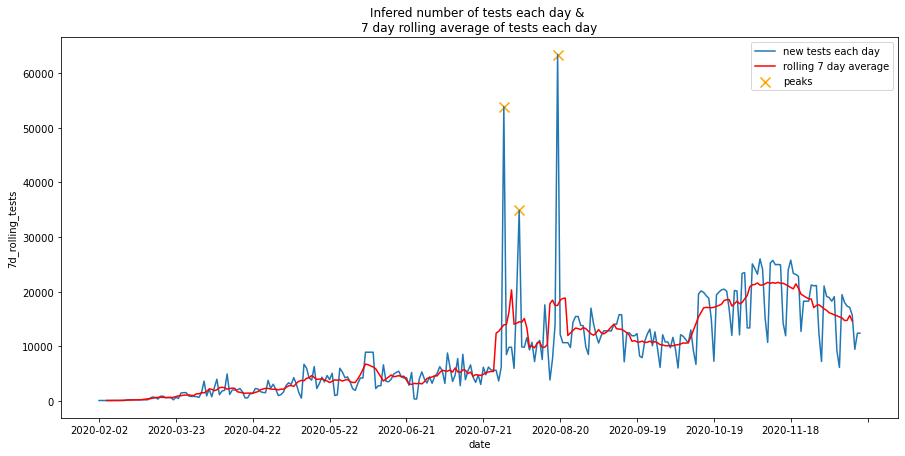

In [65]:
fig, ax = plt.subplots(figsize=(15,7))
g = sns.lineplot(data=inf_gr, x="date", y="new_tests")
g.set(xticks=[ i for i in range(len(inf_gr)) if i%30==0] )
g.scatter(argpeaks, peaks, marker='x', color='orange', s=100)
plt.title("Infered number of tests each day & \n7 day rolling average of tests each day")

inf_gr ["7d_rolling_tests"] = inf_gr.new_tests.rolling(7).mean().shift(-3)

g = sns.lineplot(data=inf_gr, x="date", y="7d_rolling_tests", color='red', ax=ax)
g.legend(["new tests each day", "rolling 7 day average", "peaks"])

Text(0.5, 1.0, '7 day rolling average of new cases each day')

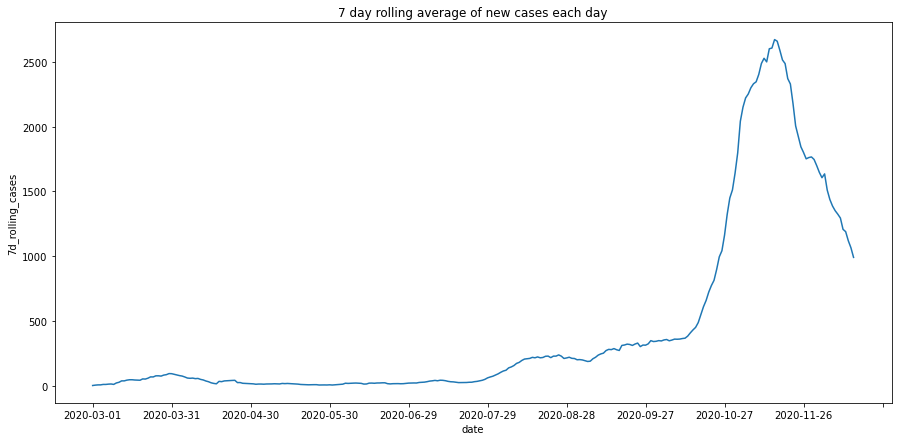

In [54]:
inf_gr ["7d_rolling_cases"] = inf_gr.new_cases.rolling(7).mean().shift(-3)
plt.figure(figsize=(15,7))

g = sns.lineplot(data=inf_gr, x="date", y="7d_rolling_cases")
g.set(xticks=[ i for i in range(len(inf_gr)) if i%30==0] )
plt.title("7 day rolling average of new cases each day")

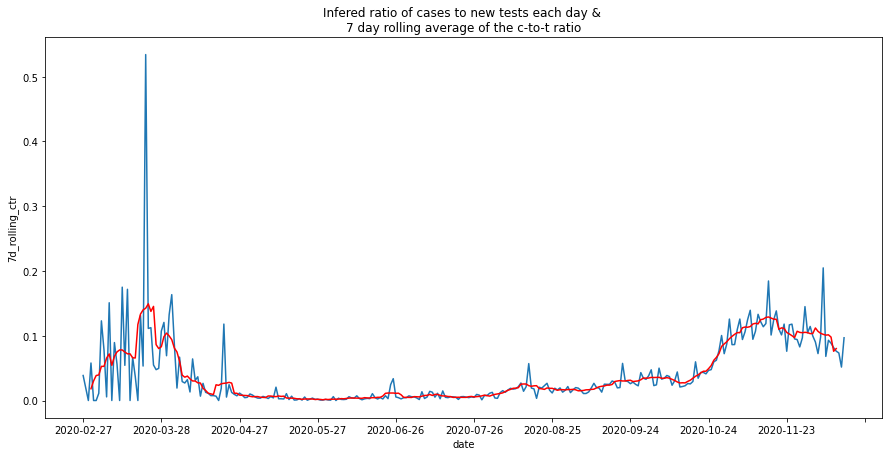

In [70]:
inf_gr["cases_tests_ratio"] = np.array(inf_gr["new_cases"].array) / np.array(inf_gr["new_tests"].array)


fig, ax = plt.subplots(figsize=(15,7))
g = sns.lineplot(data=inf_gr, x="date", y="cases_tests_ratio")
g.set(xticks=[ i for i in range(len(inf_gr)) if i%30==0] )
plt.title("Infered ratio of cases to new tests each day & \n7 day rolling average of the c-to-t ratio")

inf_gr ["7d_rolling_ctr"] = inf_gr.cases_tests_ratio.rolling(7).mean().shift(-3)

g = sns.lineplot(data=inf_gr, x="date", y="7d_rolling_ctr", color='red', ax=ax)
# g.legend(["new tests each day", "rolling 7 day average", "peaks"])

# Visualizing curves with different range
In order to visualize the curves of "new cases" and "new tests" and the curves of "7 day rolling average of cases" and "7 day rolling average of tests" in a way that would make comparison rather easy, the latter curve is scaled by means of normalizing the given curve and then multiplying the normalized values with the standard deviation of the former curve and adding its mean value.

Text(0.5, 1.0, 'Scaled ratio of tests to new cases each day over new daily new cases')

<Figure size 1080x504 with 0 Axes>

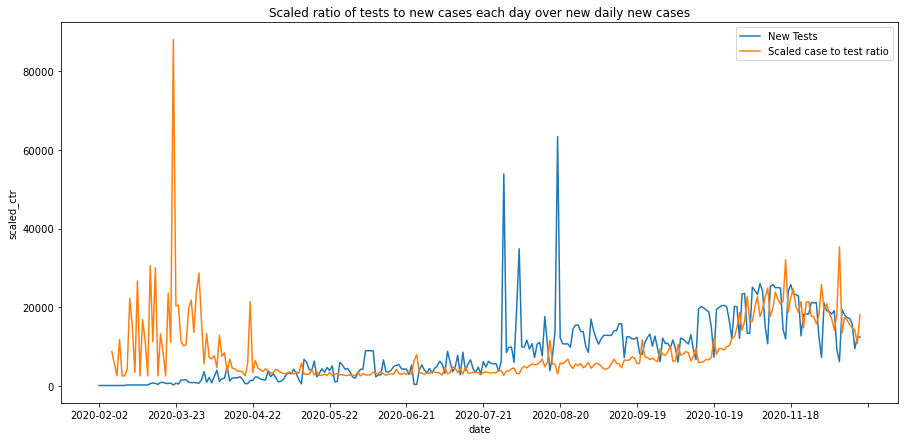

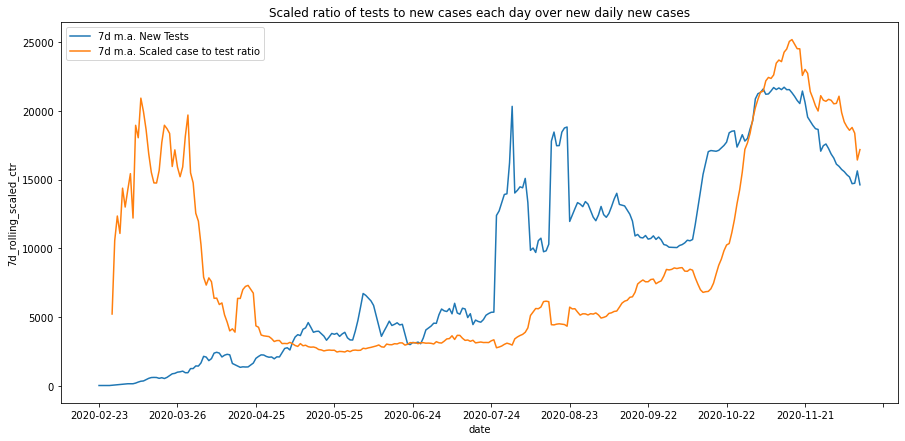

In [75]:
temp = np.array(inf_gr["new_cases"].array) / np.array(inf_gr["new_tests"].array)
temp = (temp - np.nanmean(temp)) / np.nanstd(temp)
temp = temp * np.nanstd(np.array(inf_gr["new_tests"].array)  )+ np.nanmean(np.array(inf_gr["new_tests"].array) )
inf_gr["scaled_ctr"] = temp
                                                                   
plt.figure(figsize=(15,7))
fig, ax = plt.subplots(figsize=(15,7))
g = sns.lineplot(data=inf_gr, x="date", y="new_tests", ax=ax)
g = sns.lineplot(data=inf_gr, x="date", y="scaled_ctr", ax=ax)
# g.plot(temp)
g.set(xticks=[ i for i in range(len(inf_gr)) if i%30==0] )
g.legend(["New Tests", "Scaled case to test ratio"])
plt.title("Scaled ratio of tests to new cases each day over new daily new cases")

## moving average
temp = np.array(inf_gr["7d_rolling_cases"].array) / np.array(inf_gr["7d_rolling_tests"].array)
temp = (temp - np.nanmean(temp)) / np.nanstd(temp)
temp = temp * np.nanstd(np.array(inf_gr["7d_rolling_tests"].array)  )+ np.nanmean(np.array(inf_gr["7d_rolling_tests"].array) )
inf_gr["7d_rolling_scaled_ctr"] = temp
                                                                   
fig, ax = plt.subplots(figsize=(15,7))
g = sns.lineplot(data=inf_gr, x="date", y="7d_rolling_tests", ax=ax)
g = sns.lineplot(data=inf_gr, x="date", y="7d_rolling_scaled_ctr", ax=ax)

g.set(xticks=[ i for i in range(len(inf_gr)) if i%30==0] )
g.legend(["7d m.a. New Tests", "7d m.a. Scaled case to test ratio"])
plt.title("Scaled ratio of tests to new cases each day over new daily new cases")